# Analyzing IMDB Data in Keras

In [2]:
# Imports
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

np.random.seed(42)

## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [3]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(f'Training feature vectors:\t{x_train.shape[0]}')
print(f'Testing feature vectors:\t{x_test.shape[0]}')

Training feature vectors:	25000
Testing feature vectors:	25000


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [4]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [5]:
# One-hot encoding the output into vector mode, each of length 1000
num_words = 1000
tokenizer = Tokenizer(num_words=num_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

And we'll also one-hot encode the output.

In [6]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f'Training label vectors:\t{y_train.shape}')
print(f'Testing label vectors:\t{y_test.shape}')

Training label vectors:	(25000, 2)
Testing label vectors:	(25000, 2)


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [7]:
# DONE: Build the model architecture
lr = 0.00015
l1_alpha = 0.0015

model = Sequential()

model.add(Dense(64, input_dim=num_words, kernel_regularizer=keras.regularizers.l1(l1_alpha)))
model.add(Dropout(0.50))
model.add(Activation('relu'))

model.add(Dense(64, input_dim=num_words, kernel_regularizer=keras.regularizers.l1(l1_alpha)))
model.add(Dropout(0.50))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

# DONE: Compile the model using a loss function and an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                64064     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
____

## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [8]:
# DONE: Run the model. Feel free to experiment with different batch sizes and number of epochs.

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_acc', min_delta=0.0015, patience=10,
    verbose=2, mode='auto', restore_best_weights=True)

history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=100,
                    validation_data=(x_test, y_test),
                    verbose=2,
                    callbacks=[early_stopping])

Train on 25000 samples, validate on 25000 samples
Epoch 1/100
25000/25000 - 4s - loss: 2.5028 - acc: 0.6564 - val_loss: 1.1566 - val_acc: 0.8170
Epoch 2/100
25000/25000 - 4s - loss: 0.9325 - acc: 0.7975 - val_loss: 0.7560 - val_acc: 0.8154
Epoch 3/100
25000/25000 - 4s - loss: 0.7115 - acc: 0.8162 - val_loss: 0.6224 - val_acc: 0.8412
Epoch 4/100
25000/25000 - 4s - loss: 0.6333 - acc: 0.8241 - val_loss: 0.5743 - val_acc: 0.8458
Epoch 5/100
25000/25000 - 4s - loss: 0.5936 - acc: 0.8334 - val_loss: 0.5479 - val_acc: 0.8508
Epoch 6/100
25000/25000 - 4s - loss: 0.5704 - acc: 0.8396 - val_loss: 0.5302 - val_acc: 0.8492
Epoch 7/100
25000/25000 - 4s - loss: 0.5555 - acc: 0.8374 - val_loss: 0.5148 - val_acc: 0.8546
Epoch 8/100
25000/25000 - 4s - loss: 0.5441 - acc: 0.8395 - val_loss: 0.5070 - val_acc: 0.8559
Epoch 9/100
25000/25000 - 4s - loss: 0.5352 - acc: 0.8448 - val_loss: 0.4947 - val_acc: 0.8565
Epoch 10/100
25000/25000 - 4s - loss: 0.5295 - acc: 0.8411 - val_loss: 0.4937 - val_acc: 0.8538

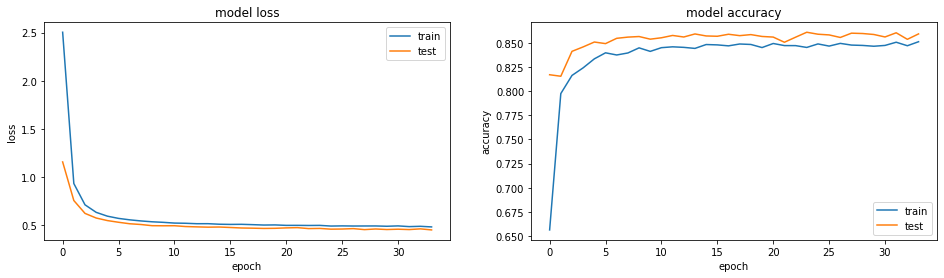

In [9]:
fig, axs = plt.subplots(figsize=(16,4), nrows=1, ncols=2)

# summarize history for loss
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('model loss')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'])

# summarize history for accuracy
axs[1].plot(history.history['acc'])
axs[1].plot(history.history['val_acc'])
axs[1].set_title('model accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'])

# plot graphs
plt.show()

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.86092
